In [ ]:
#Name:Yen Pham
#CSCE 5290  Project

import pandas as pd
import spacy
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
import io
# Read csv file to dataframes
df1 = pd.read_csv('Reddit_covid_threads.csv')
df2 = pd.read_csv('Twitter_covid_tweets.csv')
df3 = pd.read_csv('Youtube_covid_comments.csv')

df = pd.concat([df1,df2,df3])

In [ ]:
# Lemmatize text to get the original word meanings and take the nouns of them


def only_nouns(texts):
    output = []
    for doc in nlp.pipe(texts):
        noun_text = " ".join(token.lemma_ for token in doc if token.pos_ == 'NOUN')
        output.append(noun_text)
    return output


df['Text'] = only_nouns(df['Text'])

df.head()

Created_at  ...                                               Text
0  2020-02-19 01:36:55  ...  link estimate number seriousness outbreak digg...
1  2020-02-19 01:37:13  ...  moderator page lot people week lot news mainst...
2  2020-02-19 02:10:57  ...                                                   
3  2020-02-19 08:29:12  ...                               stuff glove mask day
4  2020-02-19 10:16:32  ...                                      way sub truth

[5 rows x 3 columns]

In [ ]:
# number of topics to extract
n_topics = 20
random_state = 0
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vec = TfidfVectorizer(max_features=5000, stop_words="english", max_df=0.95, min_df=2)
features = vec.fit_transform(df.Text)

# train dataset
from sklearn.decomposition import NMF
cls = NMF(n_components=n_topics, random_state=random_state)
cls.fit(features)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


NMF(n_components=20, random_state=0)

In [ ]:
# list of unique words found by the vectorizer
feature_names = vec.get_feature_names_out()

# number of most influencing words to display per topic
n_top_words = 30

for i, topic_vec in enumerate(cls.components_):
    print(i, end=' ')
    # topic_vec.argsort() produces a new array
    # in which word_index with the least score is the
    # first array element and word_index with highest
    # score is the last array element. Then using a
    # fancy indexing [-1: -n_top_words-1:-1], we are
    # slicing the array from its end in such a way that
    # top `n_top_words` word_index with highest scores
    # are returned in desceding order
    for fid in topic_vec.argsort()[-1:-n_top_words-1:-1]:
        print(feature_names[fid], end=' ')
    print()

0 people lot hospital government number job freedom risk point health reason right shit person fact medium problem choice group population care power society lie home money comment majority fear disease 
1 vaccine mandate dose immunity effect passport risk work infection datum efficacy study doctor antibody disease protection child reason transmission body choice job problem reaction term point card vaccination covid population 
2 case today number rate hospitalization breakthrough state source covid hour total positivity datum test update yesterday surge population county trend vaccination rise report school average hospital age peak recovery district 
3 booster dose effect arm today jab hour risk yesterday appointment vaccination protection adult immunity antibody question fever reaction card tomorrow morning headache study ache bit datum condition pharmacy thank group 
4 time symptom lot family friend hour person flu matter work doctor point job guy hospital period halving immunity 

In [ ]:
# Topic 0 is about society, government regulations about covid, hospitalisation and human's rights toward the laws such as jobloss, freedom, human's power, economic hardship, reccession, restrictions, sickness, poverty, etc.
# Topic 1 is about vaccination/vaccination cards (risk, symptoms, side effects) and human immunity & biology/medical facts - eiter natural immunity or through vaccination.
# Topic 2 is about covid reports and data about cases, such as weekly/daily positive cases, hositalization rate
# Topic 3 is about data and reports on how many covid vaccination shots/ boosters and participants.
# Topic 4 is about family & friend's stories, their covid symptoms, family spread, family history, holiday gartherings.
# Topic 5 is about experiences people having covid got, no matter if they vaccinated or not, such as positive test, fever, smell & tatse lost, body pain, cough, ache.
# Topic 6 is about wearing mask mandate and social distancing, virus transmission/ spread in public areas such as school, restaurants
# Topic 7 is about aging, yearning for covid end (interpreted after the summarization done in next steps), winter experience
# Topic 8 is all about covid deaths
# Topic 9 is about the "thing", any "thing" (might be meaningful/meaningless) that people commented when they wanted to show their points of view
# TOpic 10 is about personal situations/feelings/opinions during/after vaccination/booster shot, such as making appointment, sore arm, headache, fever, reaction, ache, pharmacy
# Topic 11 is about body natural immunity and anitbody, comparison of covid symptoms and common flu/cold
# Topic 12 is about "weekly" covid cases report, or experiences of patients in few weeks having covid, just like topic 2 but more focus on weekly data
# Topic 13 is about the worldwide situations during covid across countries- government issues, traveling restriction, vaccination rates, infection rates. 
# Topic 14 is just the same as topic 11, but while topic 11 talked about patients having covid symptoms with/without vaccination, topic 14 includes the "suspected" side effects after the vaccinations, such as brain fog, heart disease
# Topic 15 is about media play towards covid news
# Topic 16 is about new covid variant, eg. delta and omicron
# Topic 17 is concerns about kid's issues: vaccination on kids, schooling, kid's abuse, proper age for kids to get vaccine, etc.
# Topic 18 is about proper "way", or the choices/solutions people made in different contexts.
# Topic 19 is about human's straight feelings during covid on different things: they swear, cry, love, care, thank, feel lost   

# for testing
testing_submissions = [
    "Except that's exactly how the right reacts to elderly people dying.",
    "They're so quick to hand wave potentially millions of people away like it's nothing.",
    "Also, feel free to link any study demonstrating the vaccines have caused an influx of deaths.",
    "We have 200,000 cases per day",
    "covid vax is mandatory at school",
    "stop taking booster shots. It's not effective",
    "how about our kids, they don't need it"
]
cls.transform(vec.transform(testing_submissions)).argsort(axis=1)[:,-1]

array([ 0,  0, 14,  5, 17,  3, 19])

In [ ]:
# get the categories of 3 dataframes
df1['Category'] = cls.transform(vec.transform(df1['Text'].to_list())).argsort(axis=1)[:,-1]
df2['Category'] = cls.transform(vec.transform(df2['Text'].to_list())).argsort(axis=1)[:,-1]
df3['Category'] = cls.transform(vec.transform(df3['Text'].to_list())).argsort(axis=1)[:,-1]

In [ ]:
from google.colab import files

# put dataframes into files
df1.to_csv('Reddit_covid_threads.csv', index=False)
files.download('Reddit_covid_threads.csv')

df2.to_csv('Twitter_covid_tweets.csv', index=False)
files.download('Twitter_covid_tweets.csv')

df3.to_csv('Youtube_covid_comments.csv', index=False)
files.download('Youtube_covid_comments.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df = pd.concat([df1,df2,df3])
df['Category'] = cls.transform(vec.transform(df['Text'].to_list())).argsort(axis=1)[:,-1]
print(df)

                Created_at  ... Category
0      2020-02-19 01:36:55  ...       11
1      2020-02-19 01:37:13  ...       15
2      2020-02-19 02:10:57  ...       19
3      2020-02-19 08:29:12  ...        5
4      2020-02-19 10:16:32  ...       18
...                    ...  ...      ...
39543  2021-11-24 17:08:52  ...       13
39544  2021-11-24 16:32:23  ...       14
39545  2021-11-24 16:12:31  ...        1
39546  2021-11-24 16:05:27  ...       17
39547  2021-11-24 18:47:07  ...       18

[153855 rows x 4 columns]


In [ ]:
topics = []

for i in range(n_topics):
  topics.append(df[df['Category'] == i])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


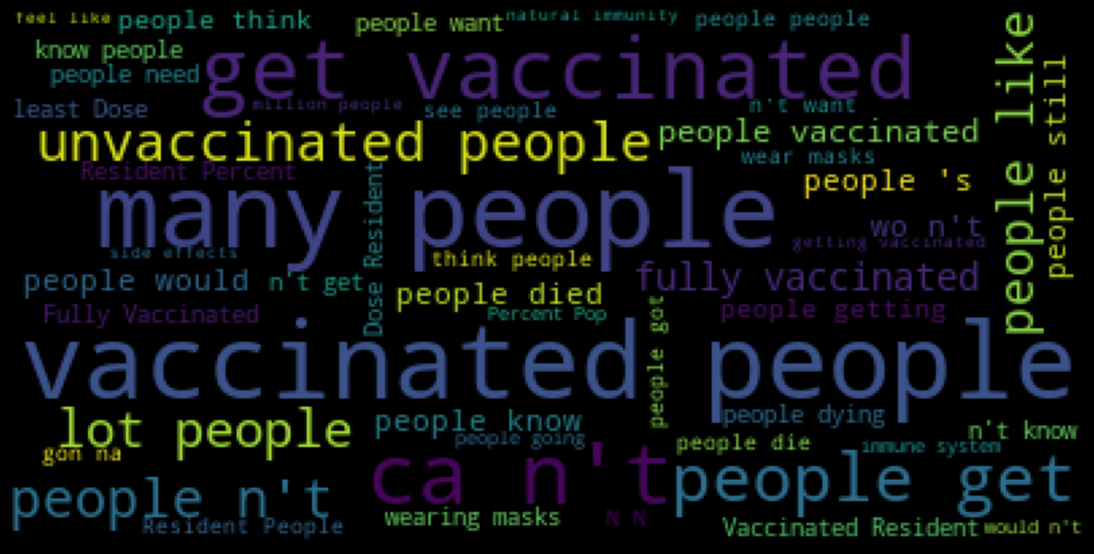

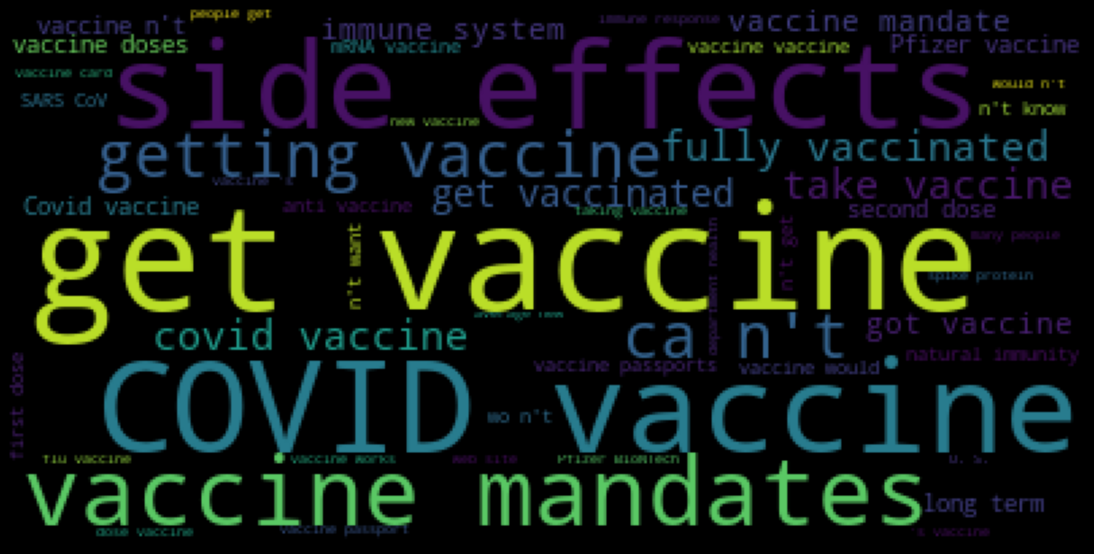

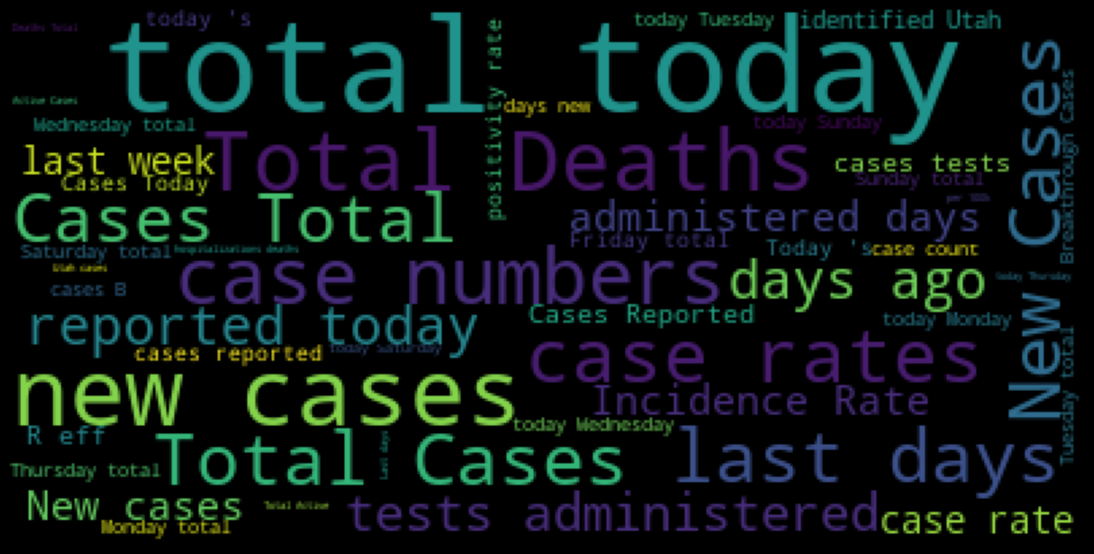

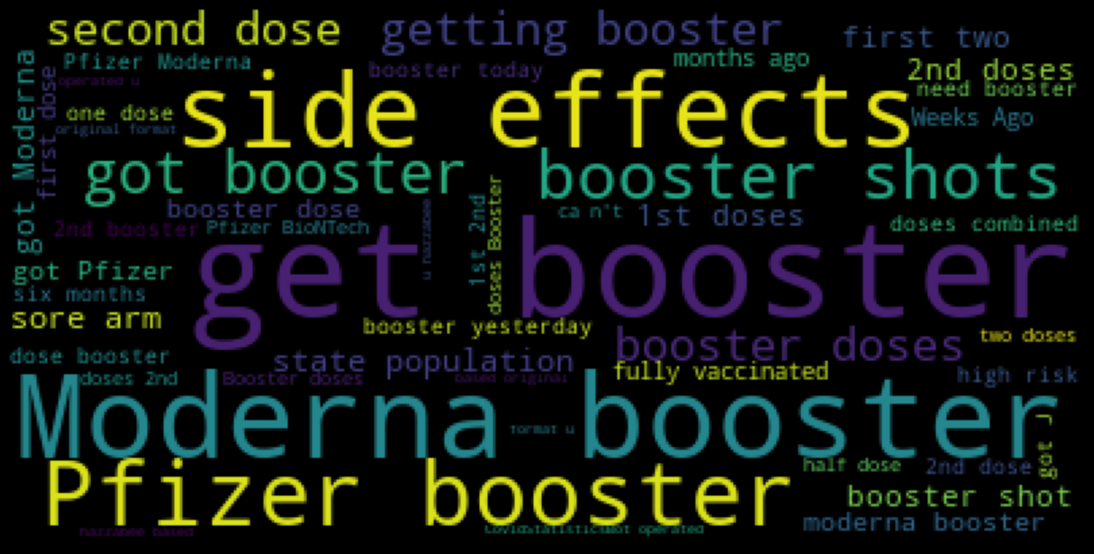

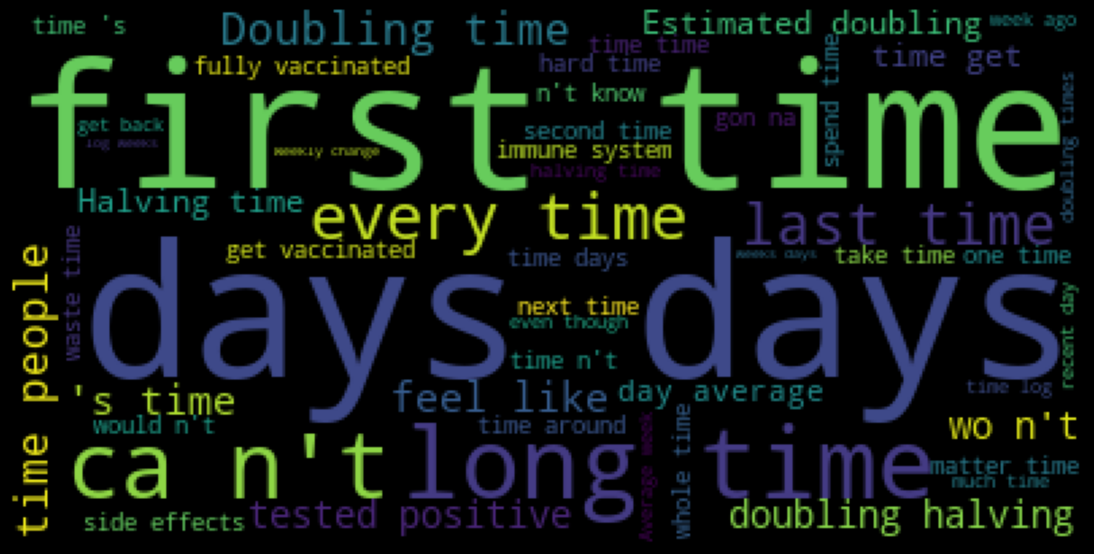

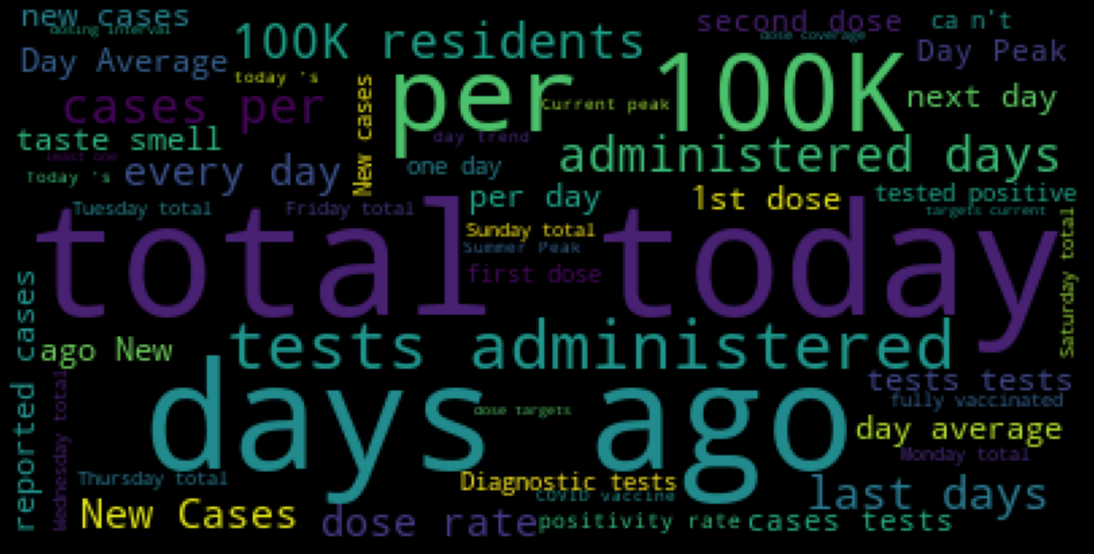

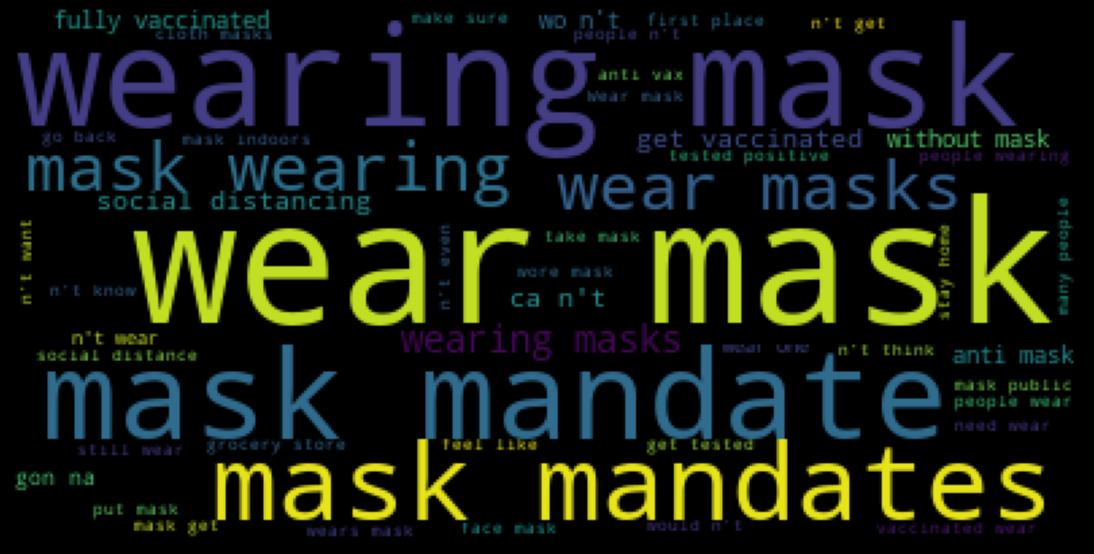

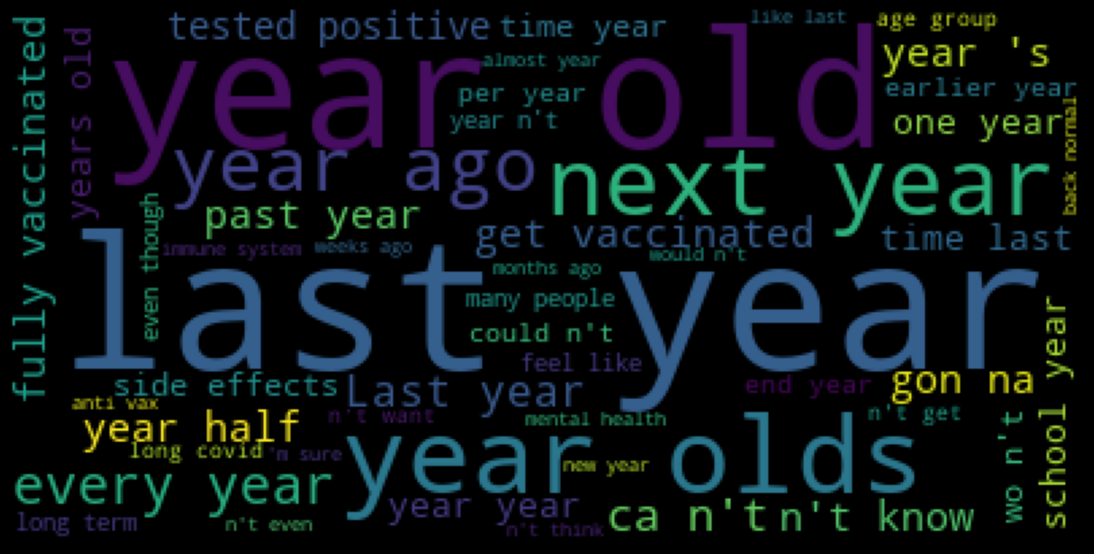

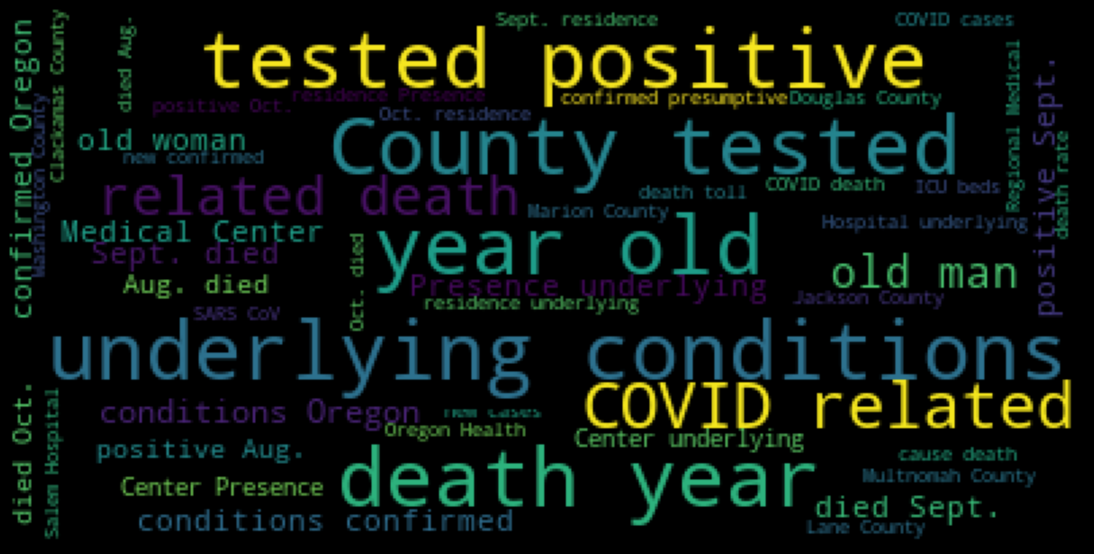

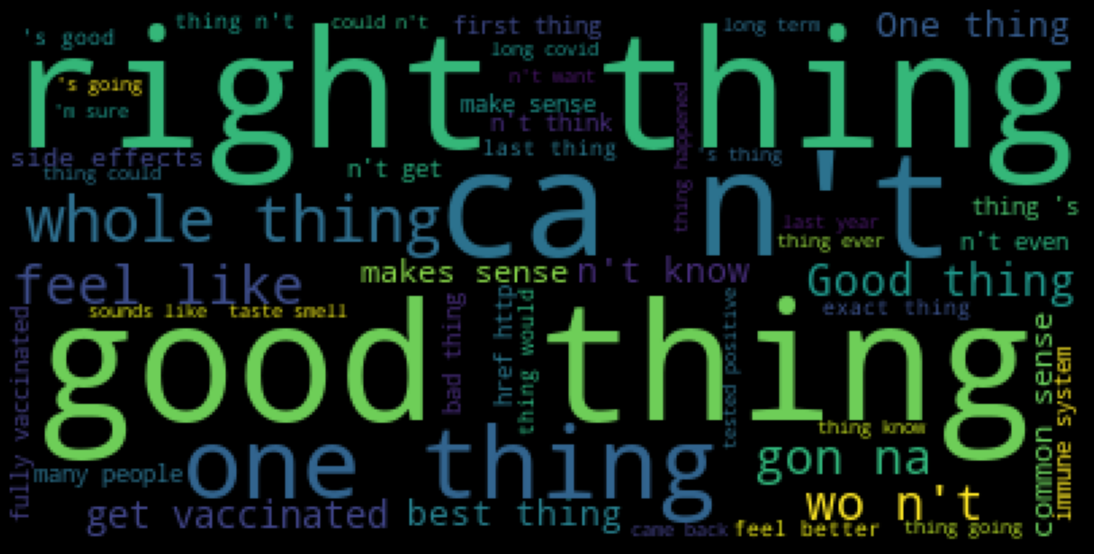

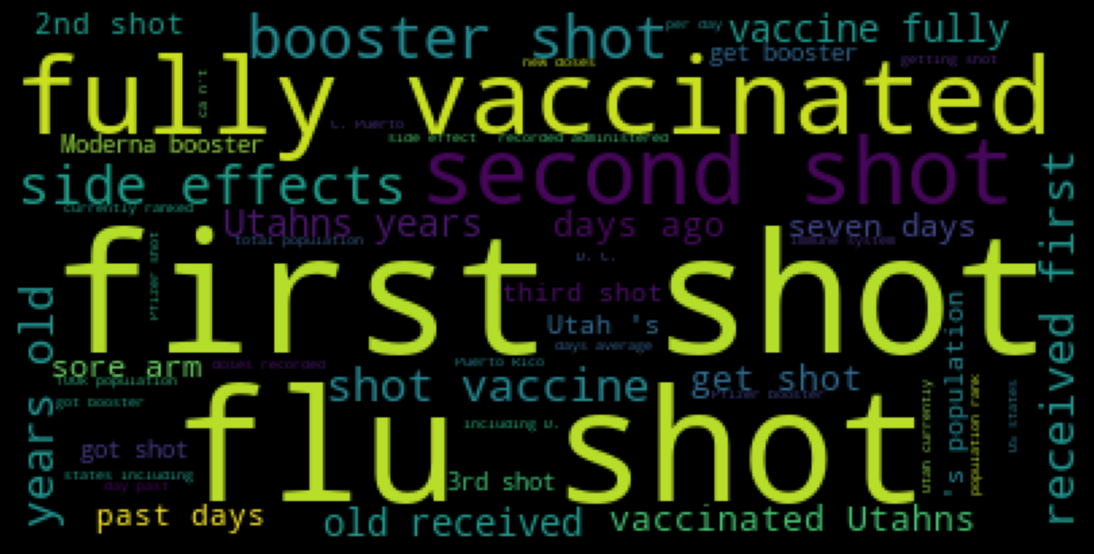

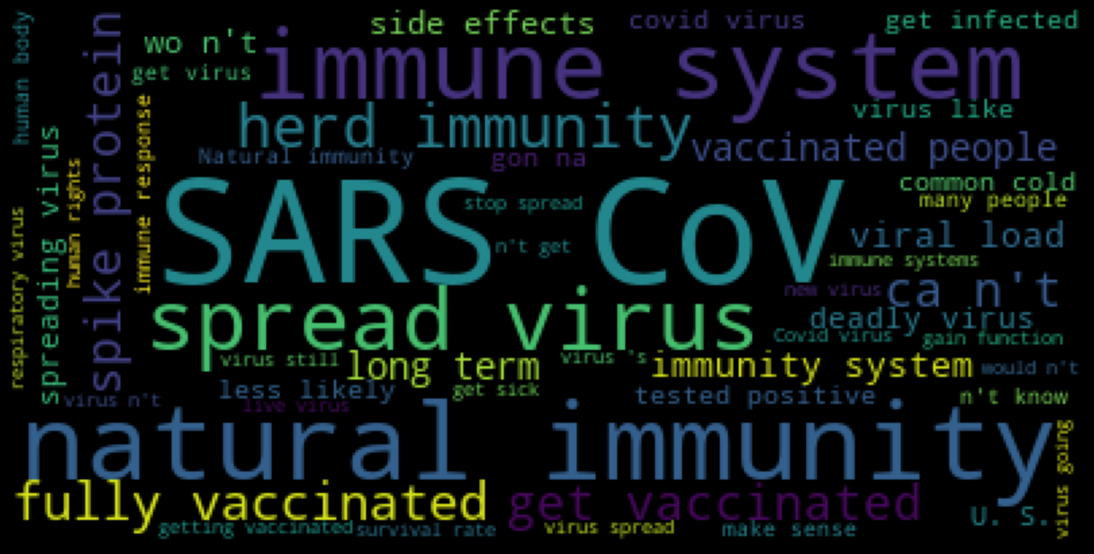

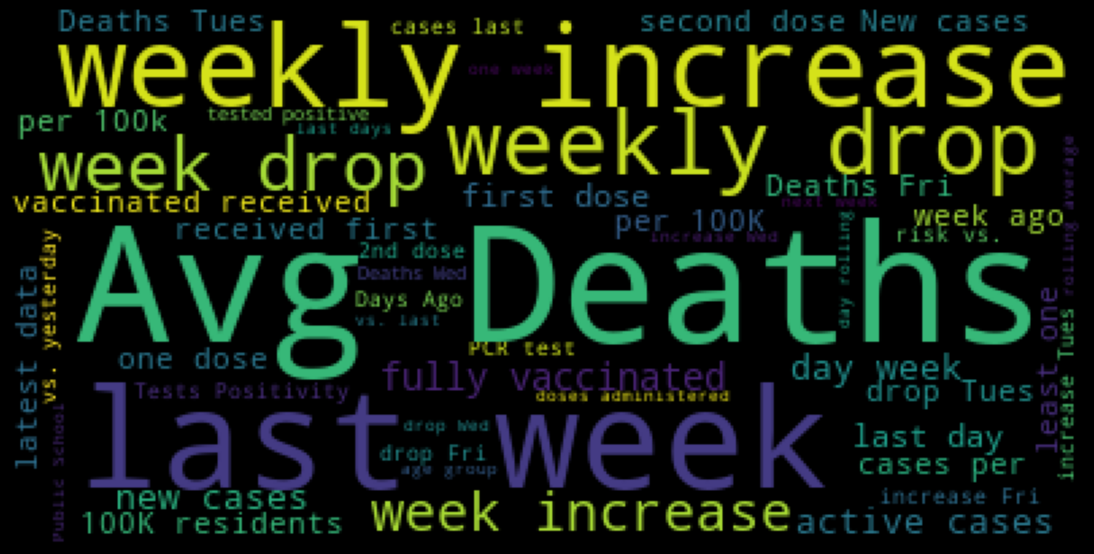

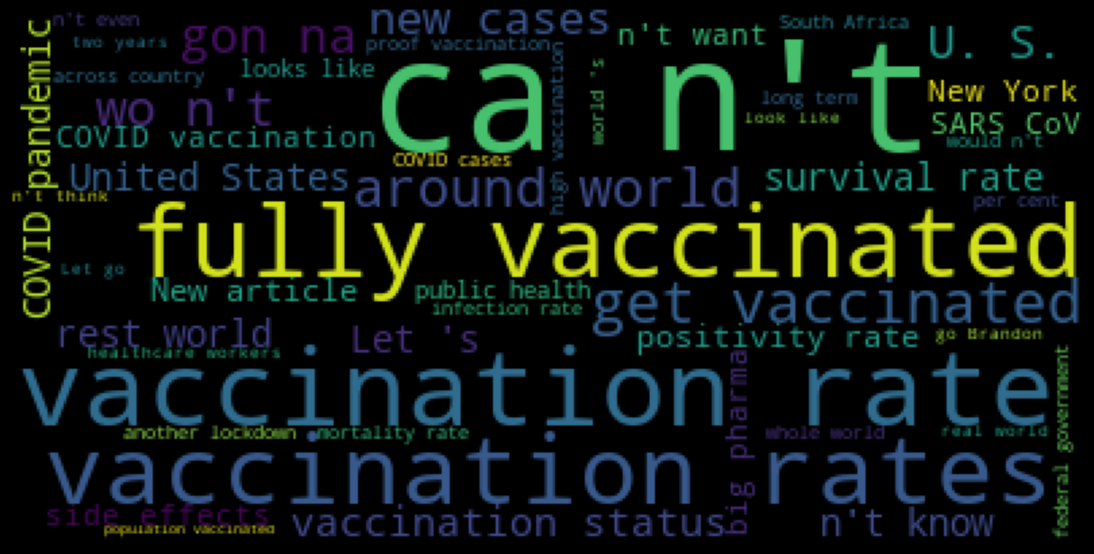

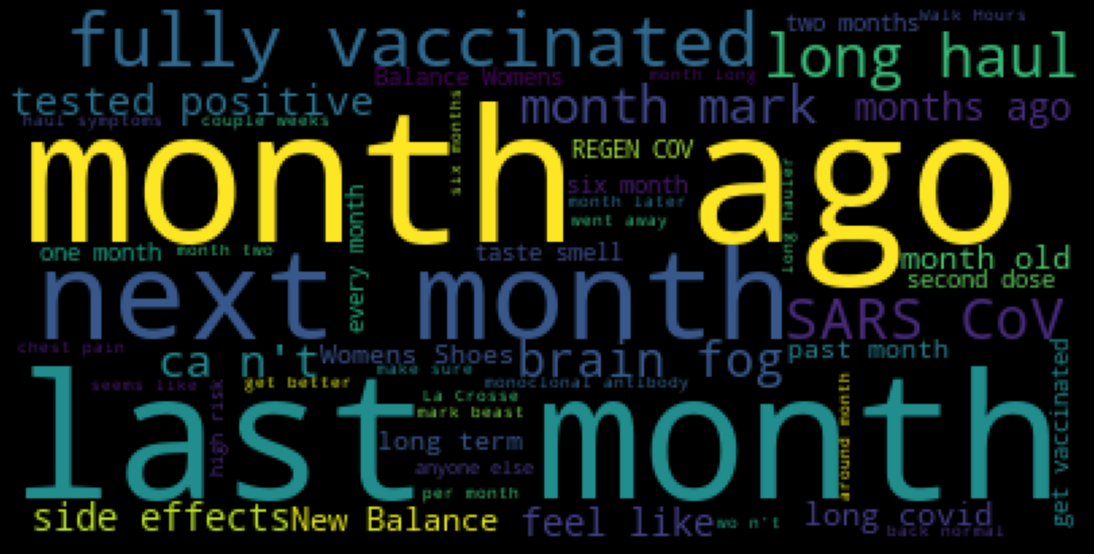

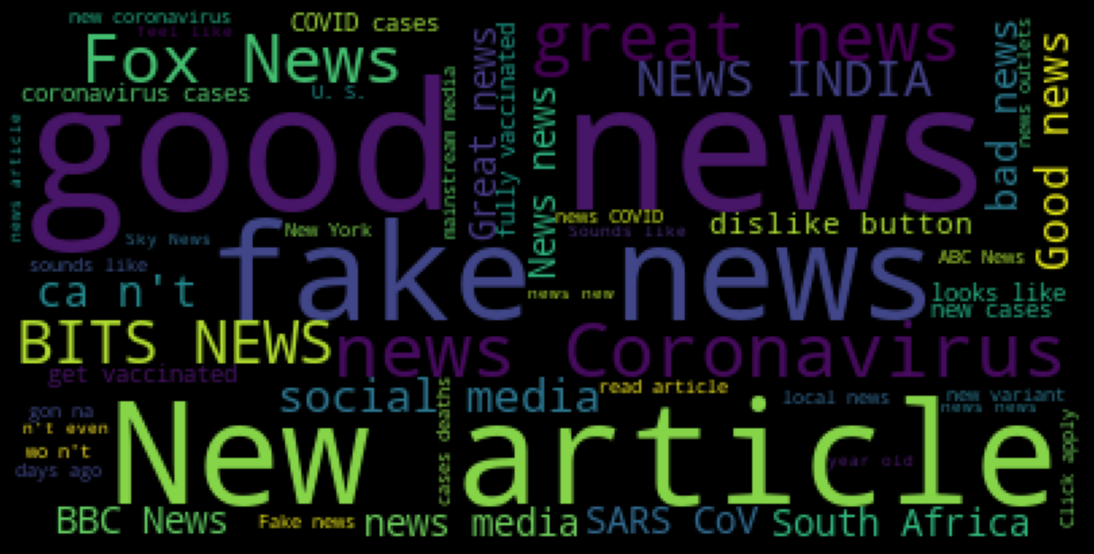

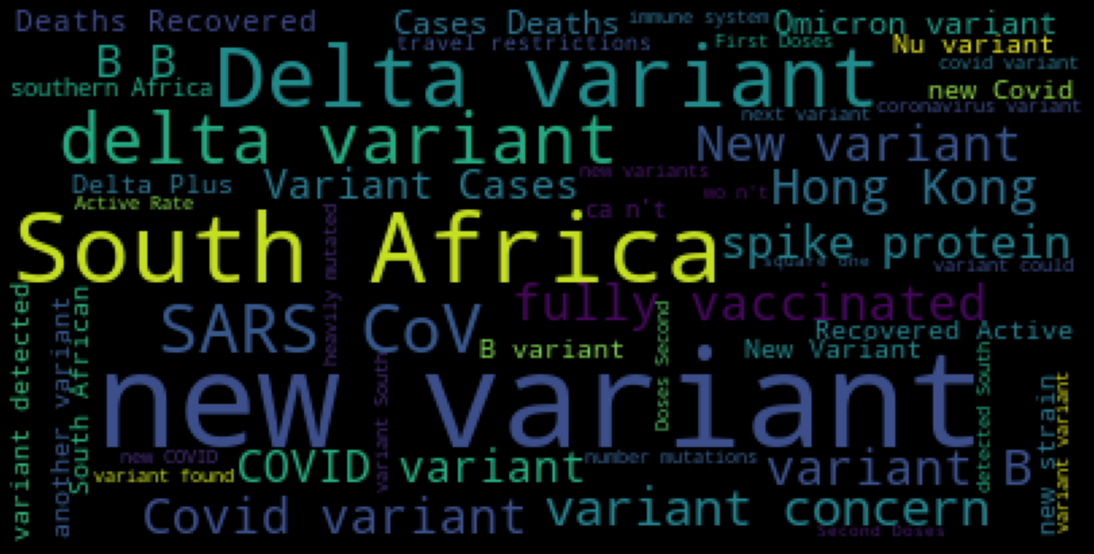

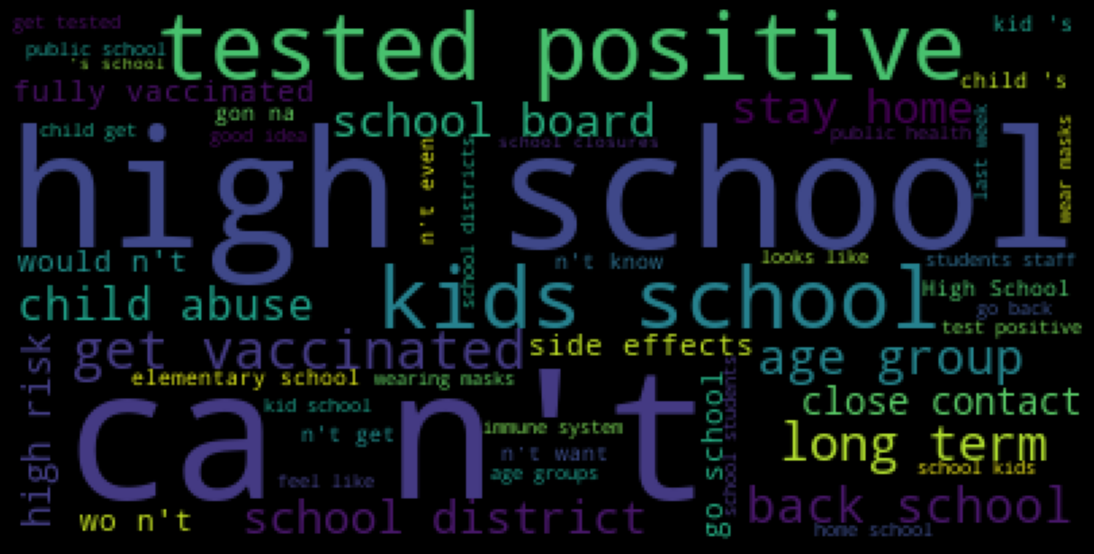

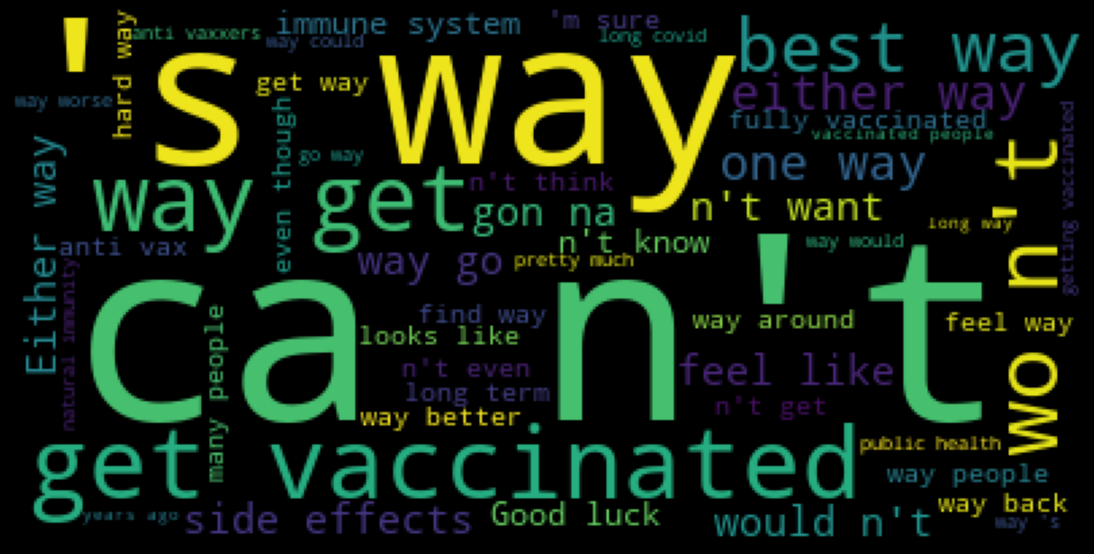

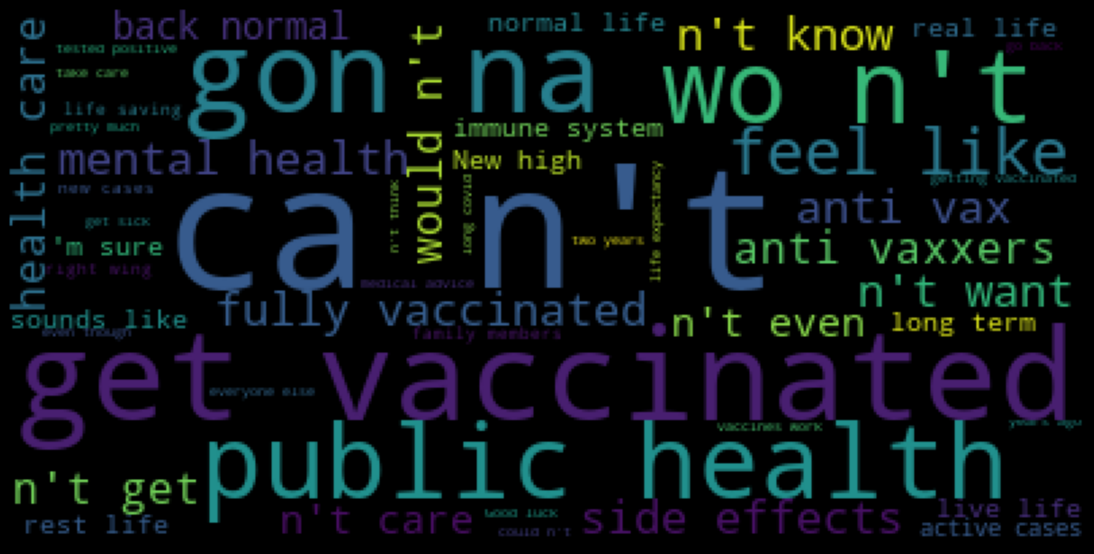

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt

stop_words = set(stopwords.words('english'))

for i in range(n_topics):
  topic_corpus = []
  for sentence in topics[i]['Text']:
    word_tokens = word_tokenize(sentence)
    filtered_sentence = [w for w in word_tokens if (not w.lower() in stop_words and not w in string.punctuation and not w.isnumeric())]
    topic_corpus.extend(filtered_sentence)
  bigram_fd = nltk.FreqDist(nltk.bigrams(topic_corpus))
  bigram_vocab = {}
  for key, count in dict(bigram_fd.most_common(50)).items():
    bigram_vocab[' '.join(key)] = count
  wc = WordCloud(background_color="black").generate_from_frequencies(bigram_vocab)
  plt.figure( figsize=(15,8), facecolor='k')
  plt.imshow(wc)
  plt.axis("off")
  plt.tight_layout(pad=0)
  plt.show()

  print("\n\n\n")
